<center><font size="+4">Programming & Data Analytics & AI 2 PM 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Notebook for Class 6 </font></center>
<center><font size="+2">Petri nets and Alpha miner. Data Lab
</font></center>

---
---

In [12]:
url_github_repo="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/"

How good are you with pm4py?
- Let's test it! :D

In [13]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

For an informed discussion on this topic, I recommend you watching classes from 2.2 to 2.7 of the [Coursera course on PM](https://www.coursera.org/learn/process-mining/home/welcome)
- https://www.coursera.org/learn/process-mining/lecture/XGSCe/2-2-petri-nets-1-2



- (2.2, 2.3) Examples on Petri nets 
- (2.4)
  - Boundedness and safeness 
  - Deadlocks in Petri net
  - Liveness
  - Transition system, Traces, Complete traces
- (2.5)
  - Workflow nets (1 start state, 1 final state)
  -  Soundness
    - Safe: places cannot hold multiple tokens at the same time
    - Proper completion: if the sink place is marked, all other places are empty
      - Implied by Option to complete
    - Option to complete: it is always possible to reach the marking that marks just the sink place
    - Deadlock-free
  - A WF-net is sound iff the corresponding short-circuited PN is live and bounded
- (2.6): We learn WF-nets with Alpha miner

> Below we provide screenshots from some slides used above

In [25]:
pm_slides=url_github_repo+'jupyter/jupyterNotebooks/images/PM/'
from IPython.display import Image, display

# Recap on Petri Nets 

...

# (2.6): We learn WF-nets with Alpha miner

## Process discovery

We can _play_ with logs in 3 ways:
- Replay: we execute a log on a model. Often done to check compliance of a trace in a model
- Play-out: we execute a model to create logs
- __Play-in__: we use logs to discover a model!
  -   This is the topic of this section

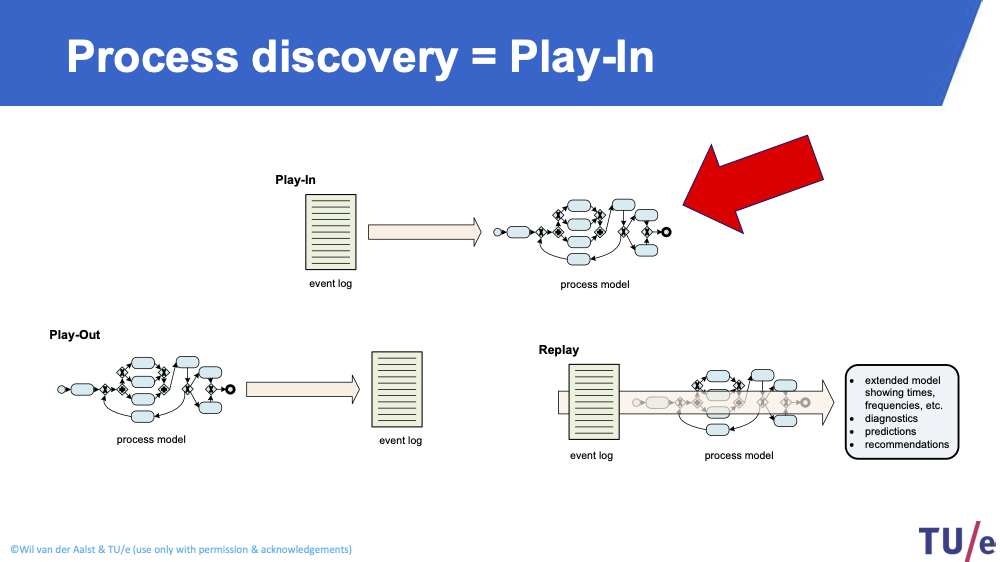

In [15]:
img=Image(pm_slides+'playOut.png',width=700)
display(img)

Typically, process idscovery algorithms take into acocunt just the activity column in event logs
- There are recent ones using also other resources, but we are not going to study them

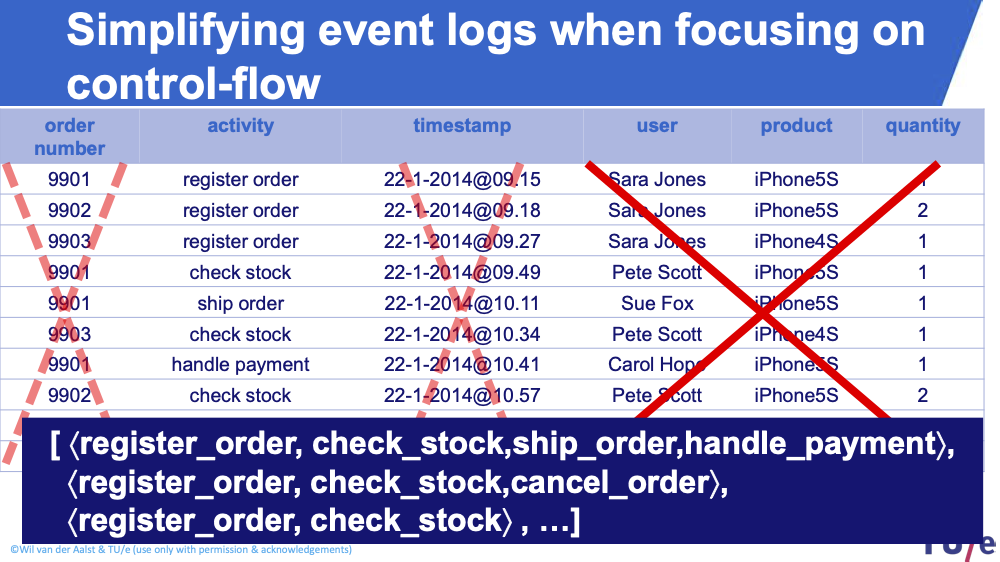

In [27]:
img=Image(pm_slides+'justActivity.png',width=700)
display(img)

A simple event log:
$$L_1 = [<a,b,c,d>,<a,b,c,d>,<a,b,c,d>,\ <a,c,b,d>,<a,c,b,d>,\ <a,e,d>]$$

Or, more compactly
$$L_1 = [<a,b,c,d>^3,\ <a,c,b,d>^2,\ <a,e,d>]$$

By now you should know that:
- A trace is a sequence of activity names 
  - usually, in process discovery we abstract from all other attributes
- An event log is a multiset of traces 
  - traces can appear more than once


Goal of Alpha algorithm
- Strong assumption: the event log is _complete_: it contains all logs of interest
  - Discover a model that can generate precisely all and only the traces in the log
- Realistic assumption: the event log is __not__ _complete_: it contains a subset of all logs of interest
  - Discover a model that can generate all the traces in the log, but also more, based on properties/regularities discovered in the traces

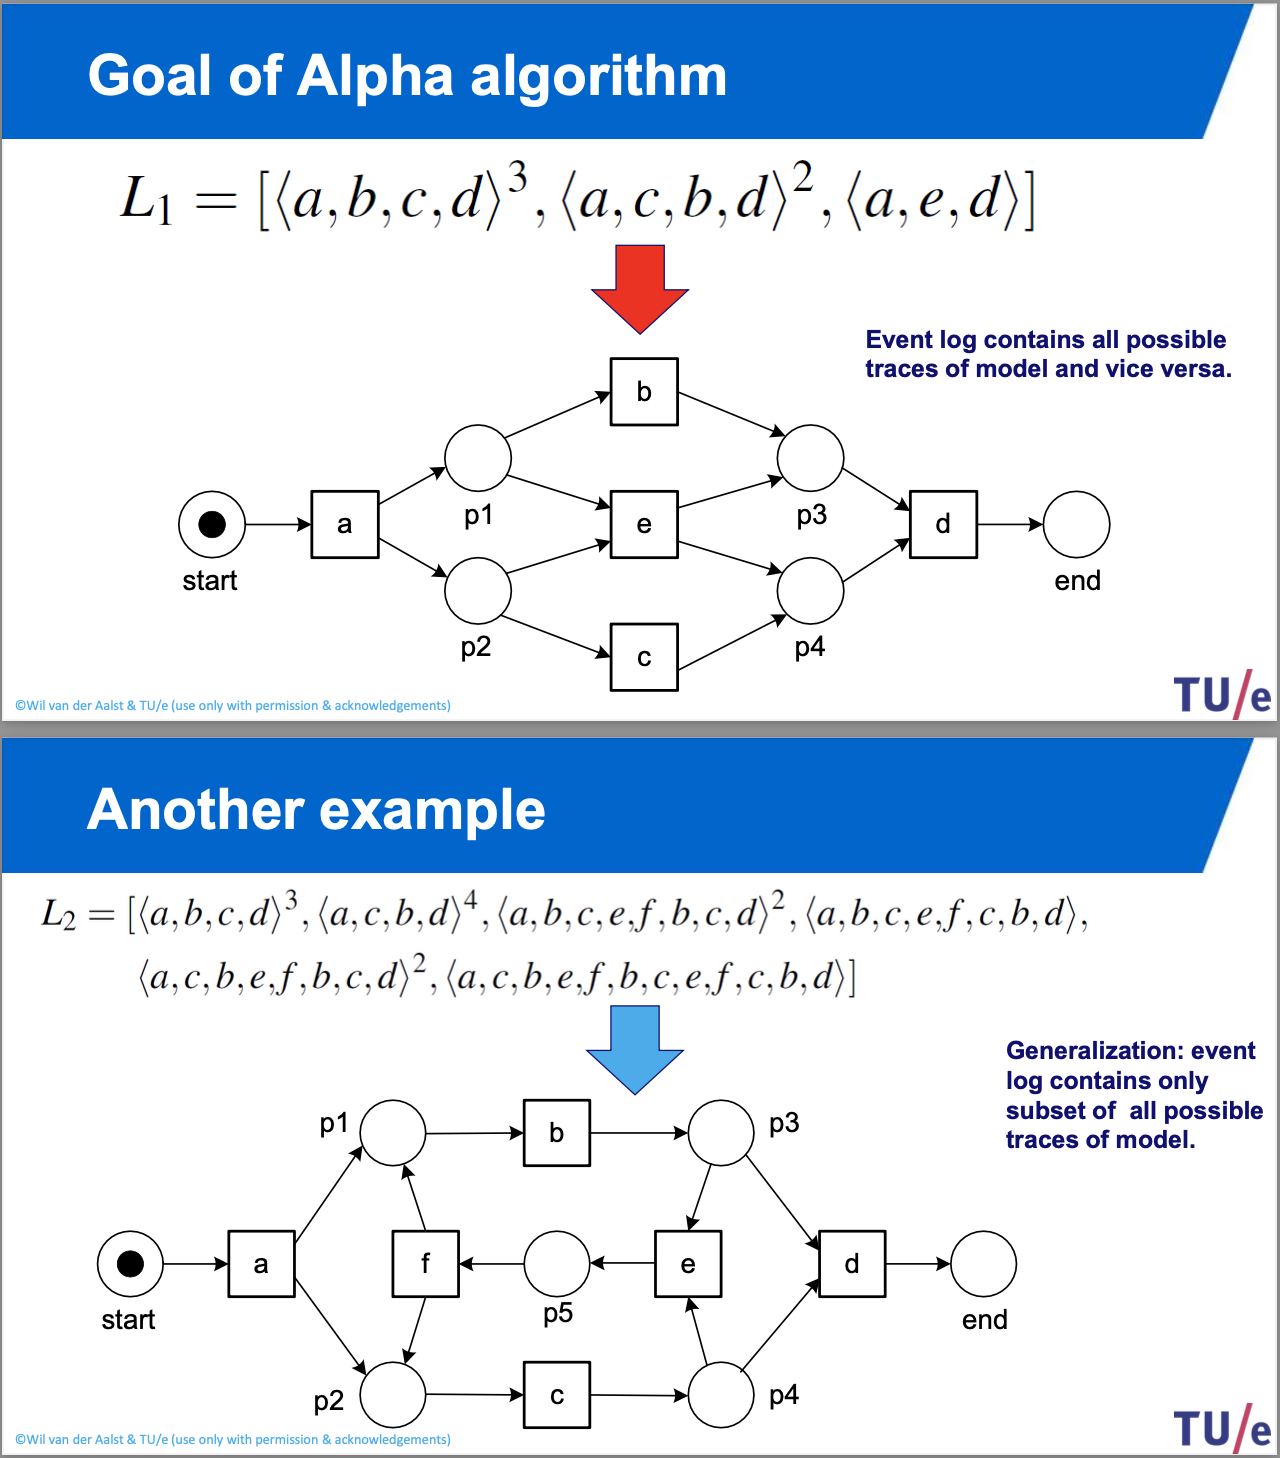

In [17]:
img=Image(pm_slides+'alphaGoal.png',width=700)
display(img)

For example, it may happen that:
- we learn a model able to generate infinitely many traces
  - here we have a _loop_:
    - the execution of `b` and `c` enables `e`
    - the execution of `e` enables `f`
    - the execution of `f` enables `b` and `c`
    - the execution of `b` and `c` enables `e`...

In [28]:
#img=Image(pm_slides+'alphaInfinite.png',width=700)
#display(img)

## Challenges and metrics for process discovery: 
- as usual in Data Science, we have trade offs!

__Fitness__ vs __Simplicity__
- Fitness: Ability to replay the observed behavior
- Simplicity: Keep model simple (Occam's razor)

__Generalization__ vs __Precision__
- Generalization: Avoid overfitting
- Precision: Avoid underfitting



## Alpha miner: the footprint

The alpha algorithm is based on four relations among activities:
- __Direct succession `>`__
  - `a>b`: There is at least one trace where `b` is the next event after `a`
- __Causality `->`__
  - `a->b`: `a>b` __and not__ `b>a`
- __Parallel `||`__
  - `a||b`: `a>b` __and__ `b>a`
- __Choice `#`__
  - `a#b`: __not__ `a>b` __and not__ `b>a`

From $L_1 = [<a,b,c,d>^3,\ <a,c,b,d>^2,\ <a,e,d>]$ we know:


__Direct succession `>`__
- `abcd`
  - `a>b`
  - `b>c`
  - `c>d`
- `acbd`
  - `a>c`
  - `b>d`
  - `c>b`
- `aed`
  - `a>e`
  - `e>d`


__Causality `->`__
- `a->b`
- `a->c`
- `a->e`
- `b->d`
- `c->d`
- `e->d`


__Parallel `||`__
- `b||c` (and `c||b`)

__Choice `#`__
- `b#e` (and `e#b`)
- `c#e` (and `e#c`)
- `a#d` (and `d#a`)

> Direct succession `>`
> - is not used directly in the Algorithm
> - is used to define the other 3 relations

Given Causality, Parallel, and Choice, we can learn _patterns_ in the process

1. `a -> b` relations allow us to learn the
   - __sequence pattern__

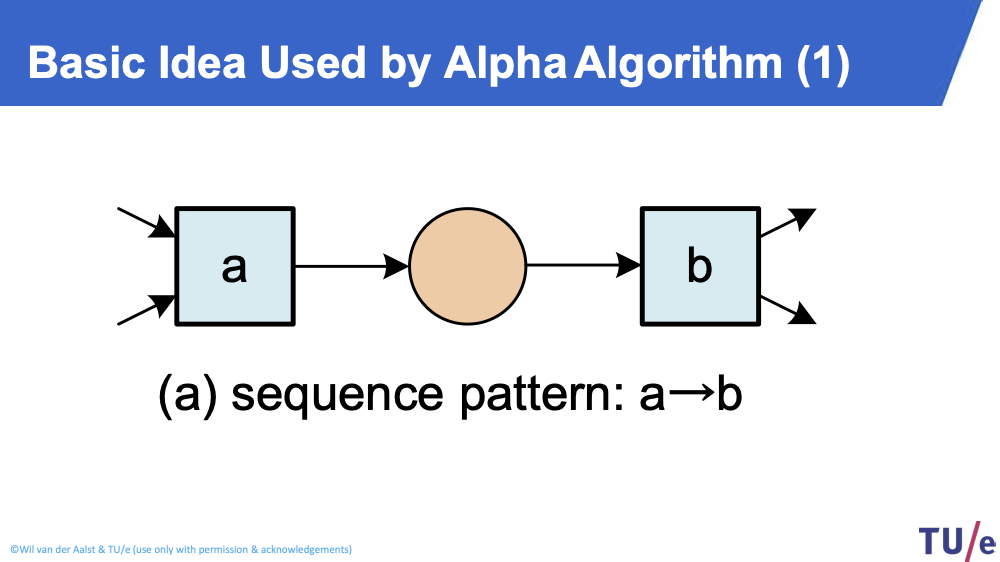

In [32]:
display(Image(pm_slides+'sequencePattern.png',width=700))

2. The combination of `->` and `#` relations allow us to learn the
   - __XOR-split__ and
   - __XOR-join__ patterns

In [33]:
#display(Image(pm_slides+'xorsplit.png',width=700))

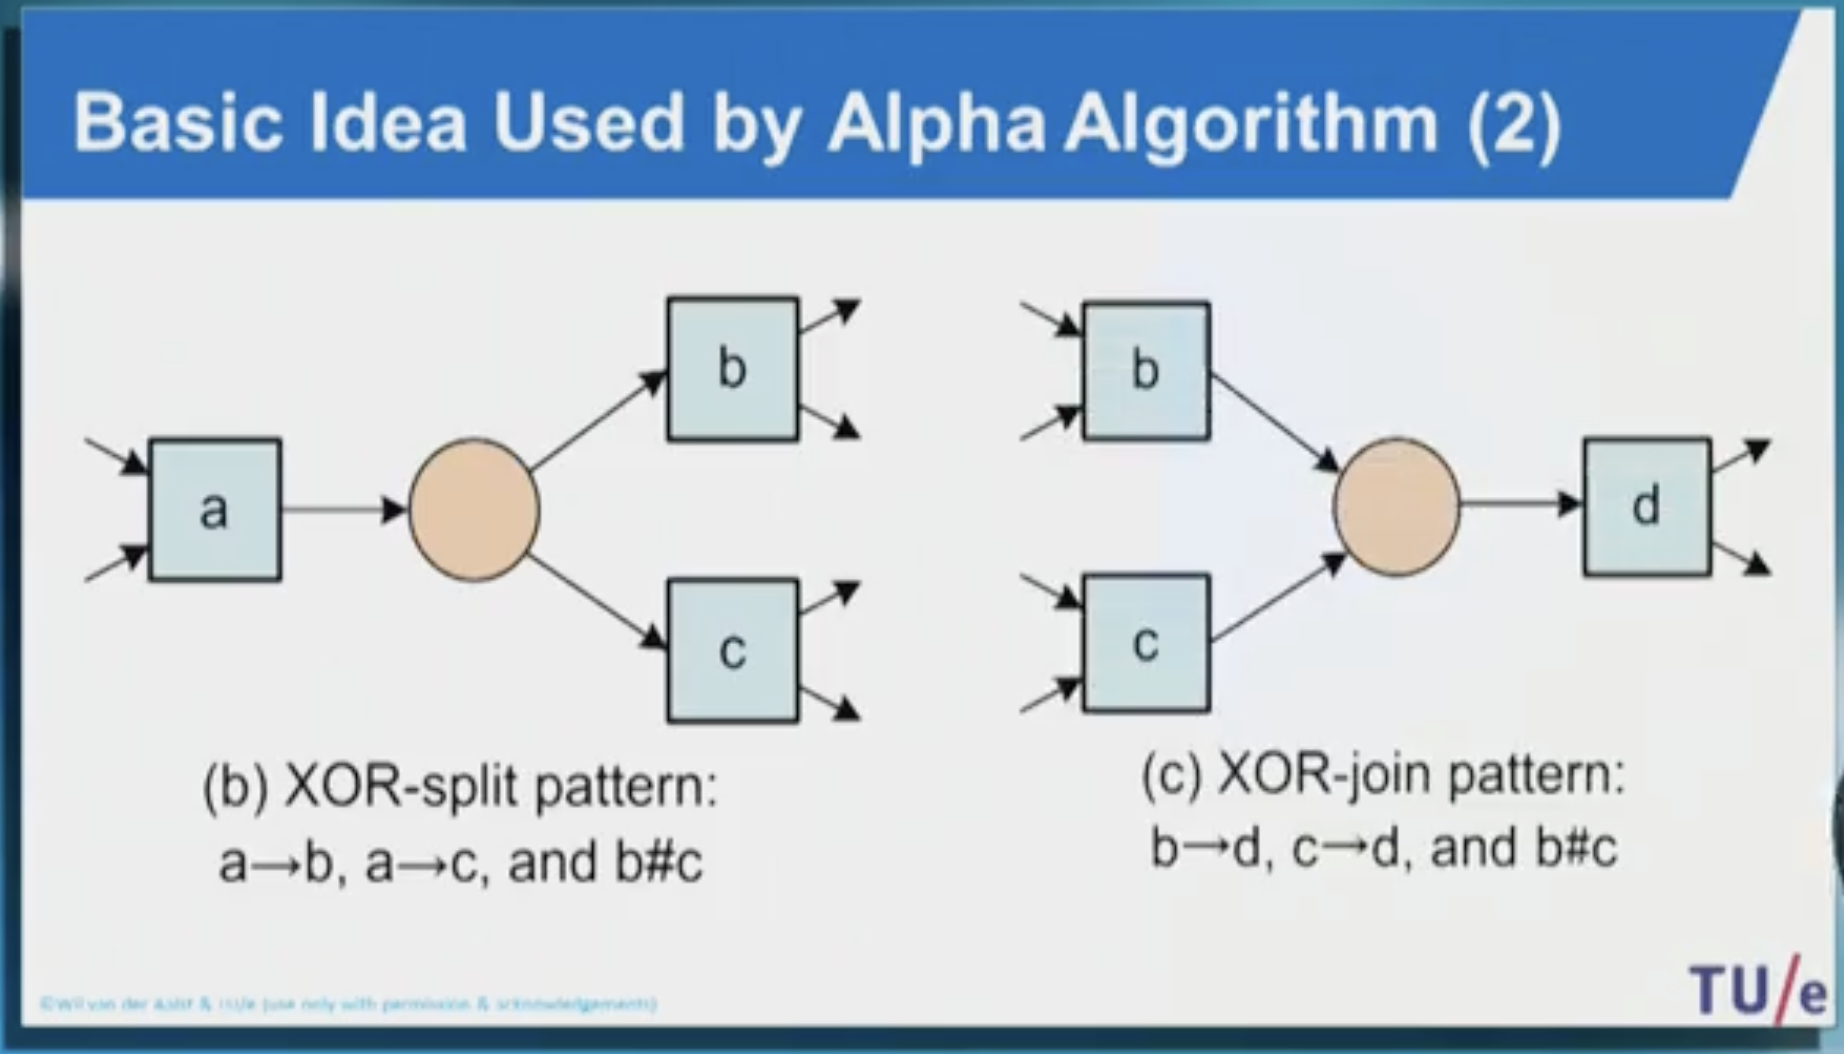

In [35]:
display(Image(pm_slides+'xorsplit2.png',width=700))

3. The combination of `->` and `||` relations allow us to learn the
   - __AND-split__ and
   - __AND-join__ patterns

In [22]:
#display(Image(pm_slides+'andSplit.png',width=700))

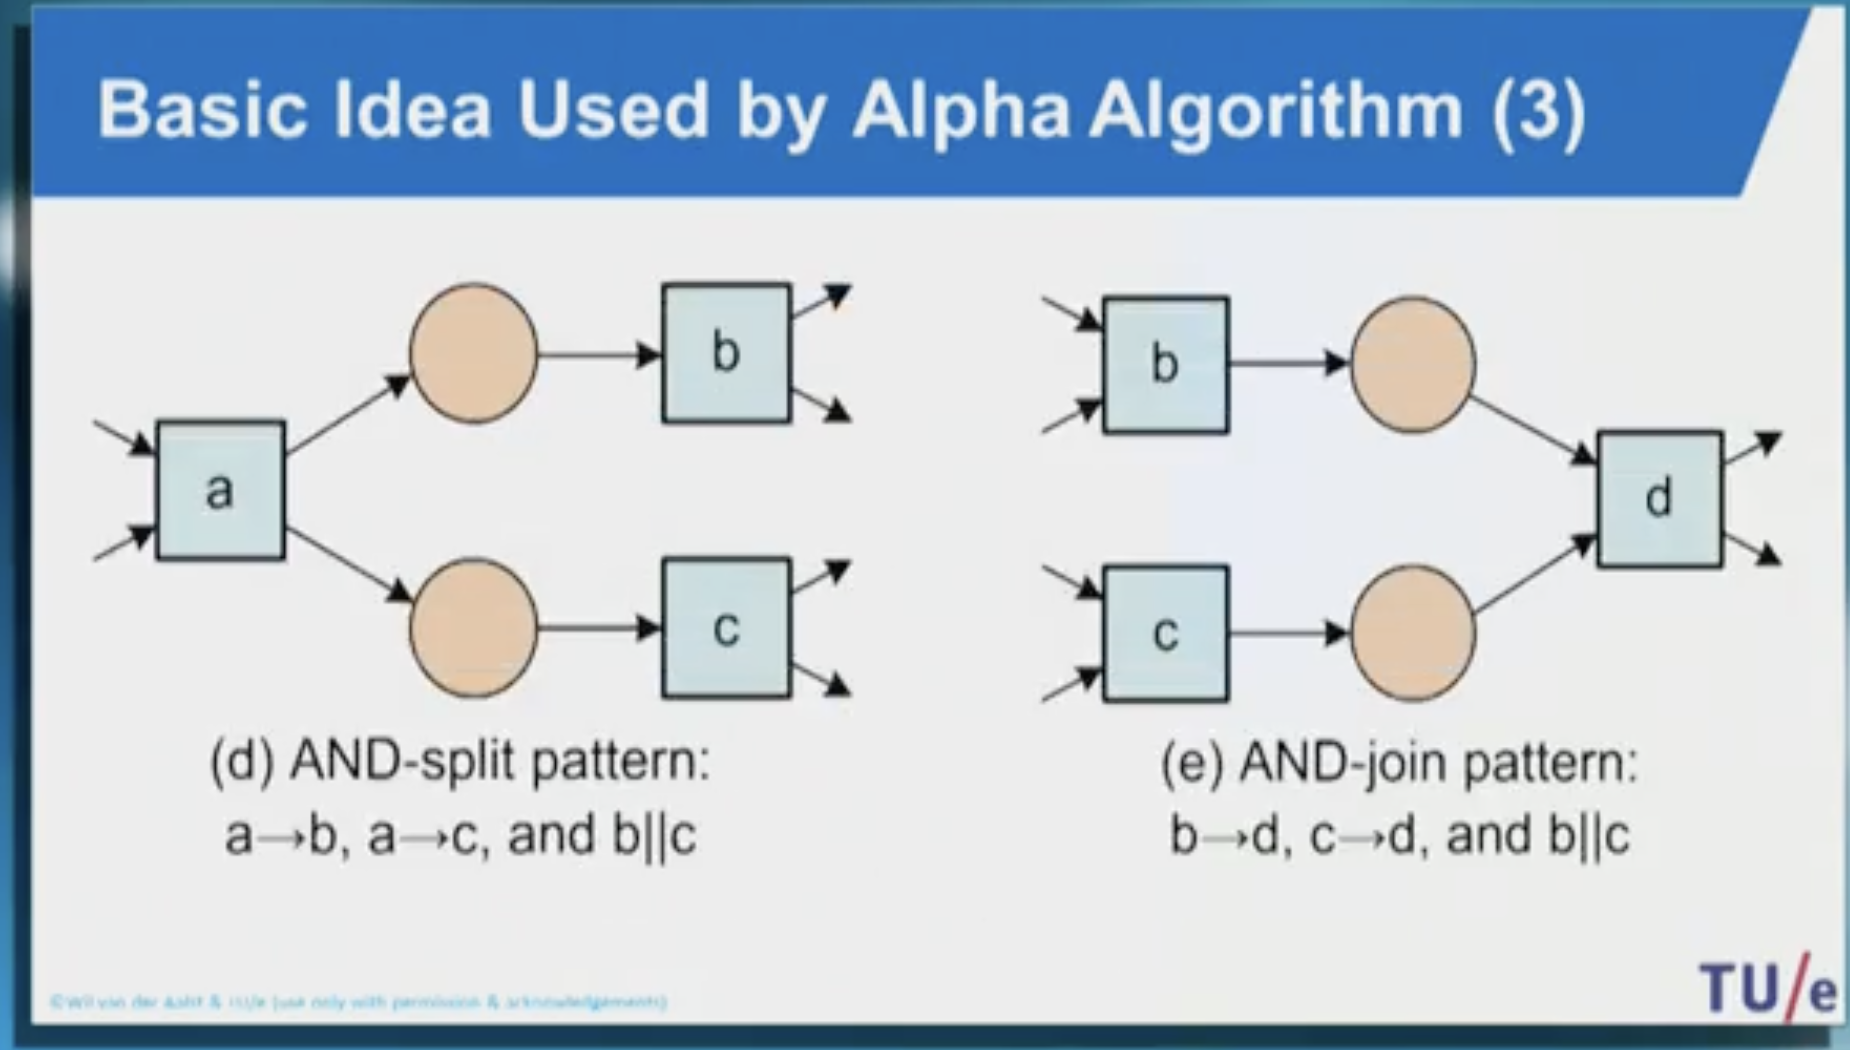

In [43]:
display(Image(pm_slides+'andSplit2.png',width=700))

In [ ]:
display(Image(pm_slides+'patterns.png',width=700))

Intuitively, the algorithm:
- first builds all such relations for each pair of activities
  - These are collected in the __footprint__ of the log 
- then, based on such relations, it learns these 3 patterns

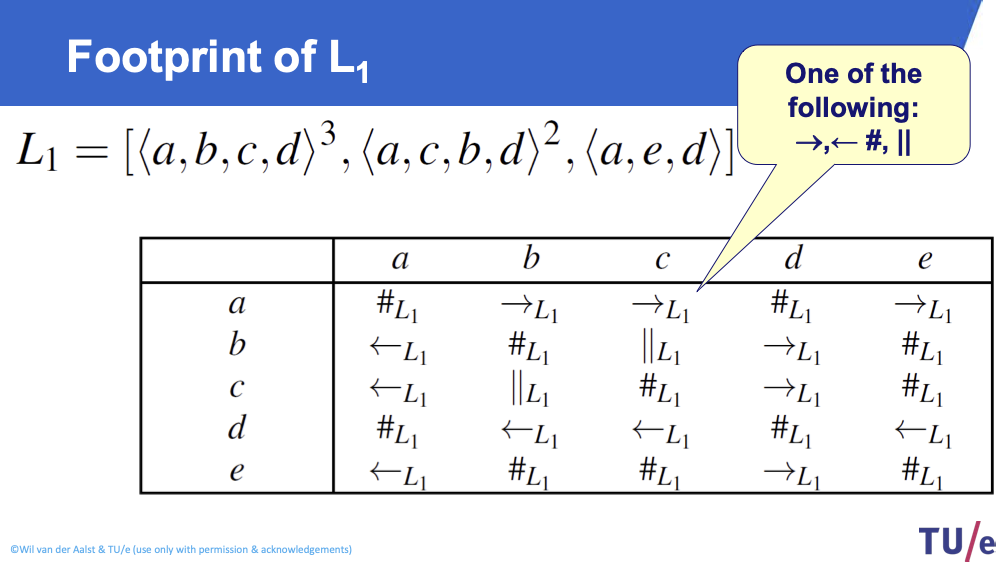

In [42]:
display(Image(pm_slides+'footprint.png',width=700))

The __alpha miner guarantees__ that:
- the footprint of the source log
- the footprint of all logs generable by a model
<br/>
__have the same footprint__

That is, the alpha miner is perfect in finding and modeling these _local dependencies_

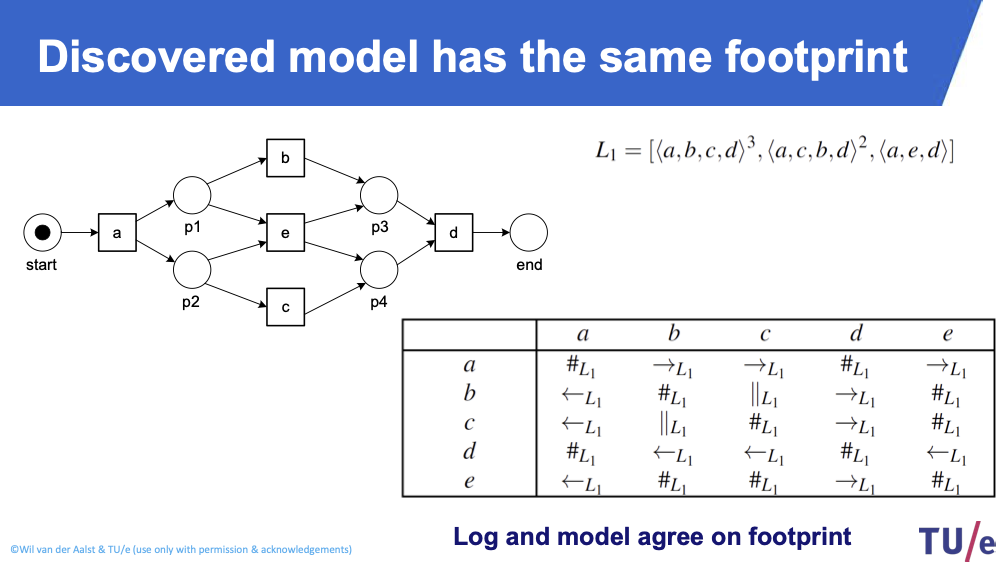

In [40]:
display(Image(pm_slides+'sameFootprint.png',width=700))

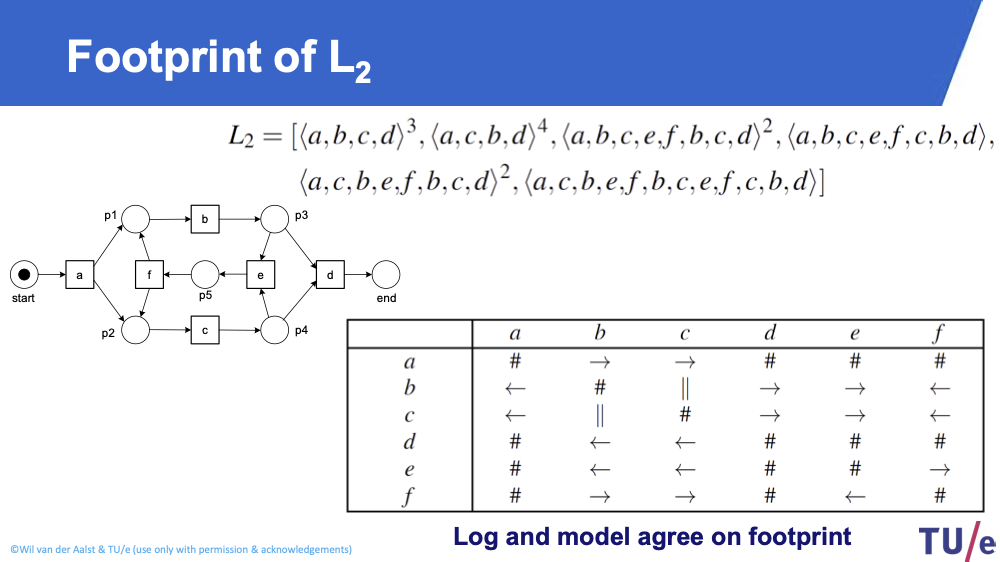

In [41]:
display(Image(pm_slides+'sameFootprint2.png',width=700))

## Alpha miner: the algorithm

In [37]:
display(Image(pm_slides+'whaat-huh.gif',width=400))

'https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/PM/'

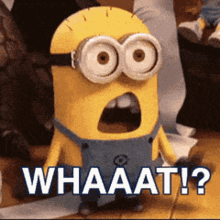

In [39]:
display(Image(pm_slides+'whaat-huh.gif',width=400))

## Alpha miner: limitations